%pip install feature_engine

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Project _ House Prices - Advanced Regression Techniques  (train csv)

In [ ]:
# Importing the Dependencies
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
pd.options.display.max_columns = 300
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import plotly.figure_factory as ff
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno
#from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from feature_engine import imputation

# Data Collection

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Train Data
Data=pd.read_csv('gdrive/My Drive/Personal Data Science Projects/House Prices - Advanced Regression Techniques/train.csv')

In [ ]:
# Test Data
Data_Test=pd.read_csv('gdrive/My Drive/Personal Data Science Projects/House Prices - Advanced Regression Techniques/test.csv')
Data_ID = Data_Test[['Id']]

import pandas_profiling 
profiling = pandas_profiling.ProfileReport(Data)
profiling.to_file("profiling.html")

import sweetviz as sv
my_report = sv.analyze(Data)
my_report.show_html()

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
Data.isnull().sum()[(Data.isnull().sum())>0]

LotFrontage     259
Alley          1369
MasVnrType        8
MasVnrArea        8
BsmtQual         37
               ... 
GarageQual       81
GarageCond       81
PoolQC         1453
Fence          1179
MiscFeature    1406
Length: 19, dtype: int64

In [ ]:
Data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df = Data.copy()

### Data Exploration

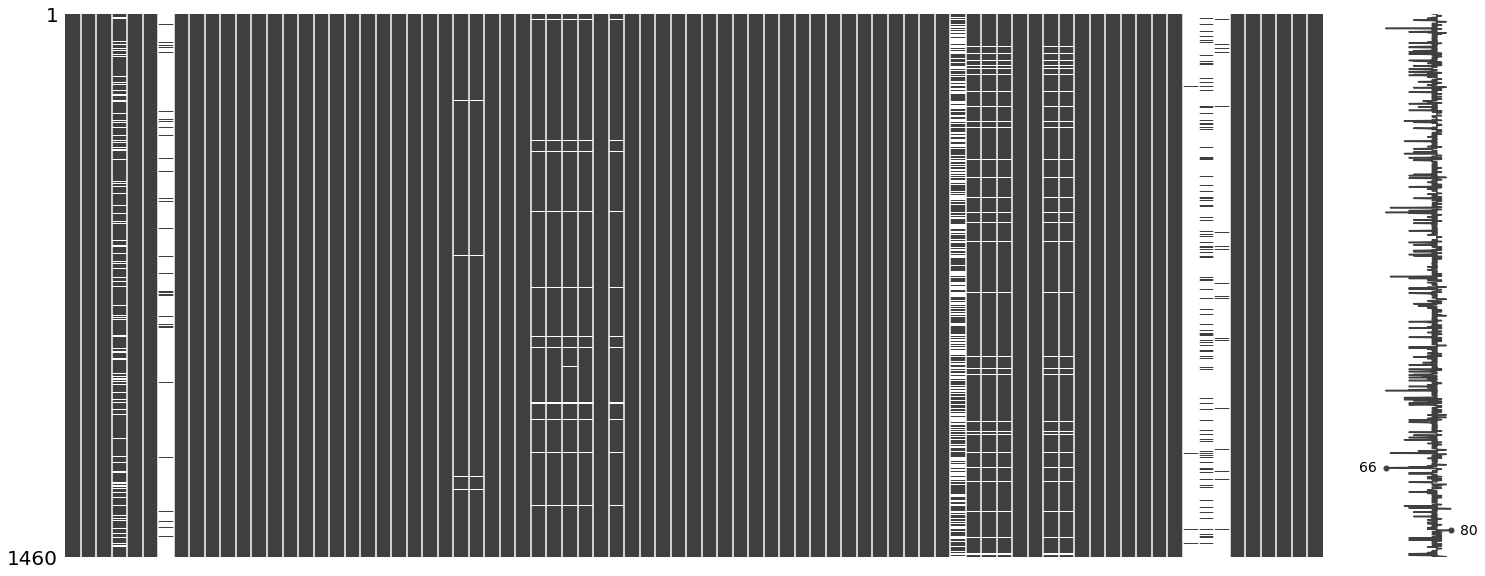

In [ ]:
# Missing Points
missingno.matrix( df )

Numerical Column Name =  ['MiscVal', 'ScreenPorch', '3SsnPorch', '2ndFlrSF', 'OpenPorchSF', 'GarageYrBlt', 'BsmtUnfSF', 'LowQualFinSF', 'GarageArea', 'TotRmsAbvGrd', 'PoolArea', 'BsmtFinSF2', 'MoSold', 'GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'TotalBsmtSF', 'Fireplaces', 'EnclosedPorch', 'GarageCars', 'WoodDeckSF', 'YrSold']


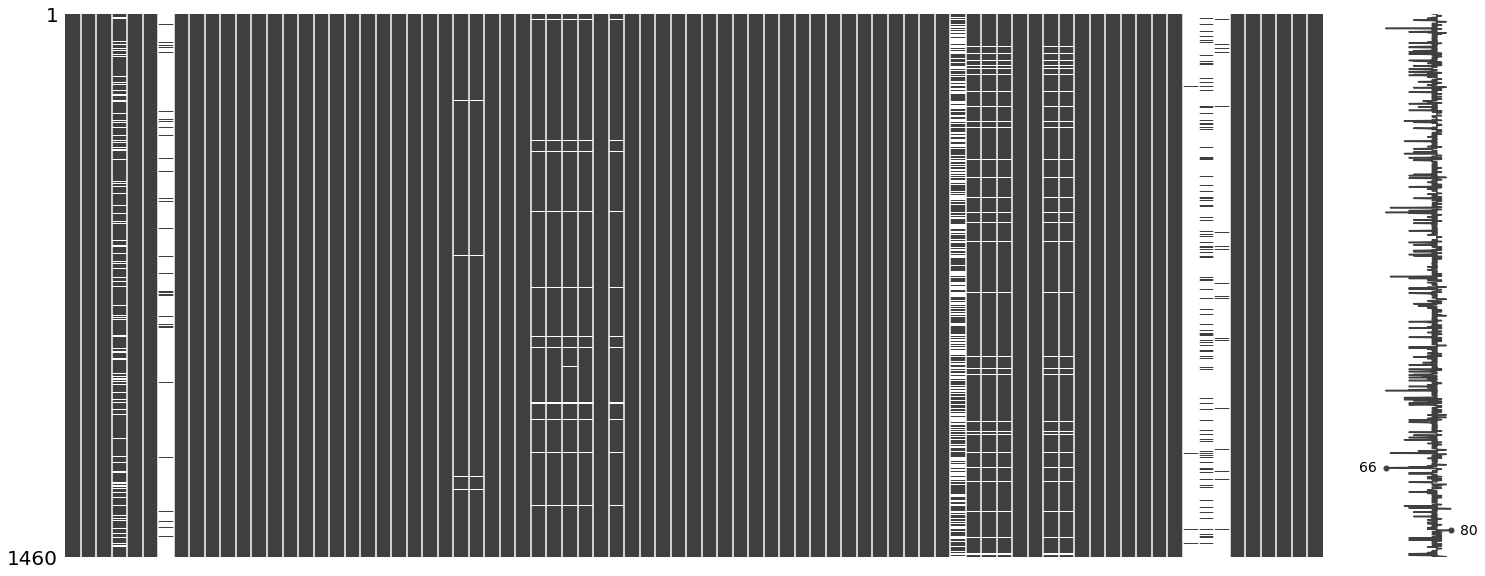

In [ ]:
catogorical_column_name = [ "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
                        "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
                        "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond",
                        "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
                        "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure",
                        "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC",
                        "CentralAir", "Electrical", "BsmtFullBath", "BsmtHalfBath", "FullBath" , "HalfBath" ,"BedroomAbvGr",
                        "KitchenAbvGr" , "KitchenQual", "Functional" ,"FireplaceQu", "GarageType", 
                        "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
                        "SaleType", "SaleCondition"]

numerical_column_name = list ( set(Data.columns) - set( catogorical_column_name ) - set(['SalePrice','Id']) )
print("Numerical Column Name = ",numerical_column_name)
target_feature_name = 'SalePrice'
month_year_columns_df = df[['YearBuilt',"YearRemodAdd","GarageYrBlt","MoSold","YrSold"]]

# Missing Points in Categorial Features
missingno.matrix(df)

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Exploring Categorical Variables and Encoding them

__Feature Name__ : __MSSubClass__ <br>
***
__Description__ : Identifies the type of dwelling involved in the sale.
main road on to which the plot or building fronts.<br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [ ]:
feature = "MSSubClass"
feature_df = pd.DataFrame(df[feature])
print( feature_df[feature].unique() )
px.histogram(feature_df)

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


In [ ]:
temp = { 20:1, 30:2, 40:3, 45:4, 50:5, 60:6, 70:7, 75:8, 80:9, 85:10, 90:11, 120:12, 150:13, 160:14, 180:15, 190:16 }
feature_df['MSSubClass'] = feature_df['MSSubClass'].replace(to_replace=temp)

# Defining a DateFrame for Categorical Variable
Cat_df = feature_df.copy()

Cat_df_Test = pd.DataFrame()
Cat_df_Test[feature] = Data_Test[feature].replace(to_replace=temp)

__Feature Name__ : __MSZoning__ <br>
***
__Description__ : Identifies the general zoning classification of the sale. <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

In [ ]:
feature = "MSZoning"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['RL' 'RM' 'C (all)' 'FV' 'RH']


In [ ]:
one_hot = OneHotEncoder(top_categories=3)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)
Cat_df = pd.concat([Cat_df,feature_df],axis=1)

In [ ]:
Data_Test[feature].fillna(value=Data_Test[feature].mode().values[0],inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __LotFrontage__ <br>
***
__Description__ : It is the measurement of the length of a plot of land or a building facing the
main road on to which the plot or building fronts.<br>
__Data Type__ : Numeric (Continuous)<br>
__Correlation__ : No <br>
__Missing_Values__ : Present

__Change_in_Distribution_after_imputing_null_values_with_mean__ : Unacceptable (Signnificant change in variance)

In [ ]:
feature = "LotFrontage"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  LotFrontage    259
dtype: int64
--------------------------------------------------------------------------------


Original Mean :  [70.04995837]
Original variable variance:  589.7491687482653
--------------------------------------------------------------------------------
Mean after mean imputation:  70.04995836802664
Percent change in Mean after mean imputation:  [-2.02867426e-14]
Variance after mean imputation 485.05757539267887
Percent change in Variance after mean imputation:  -17.751884852638785
--------------------------------------------------------------------------------


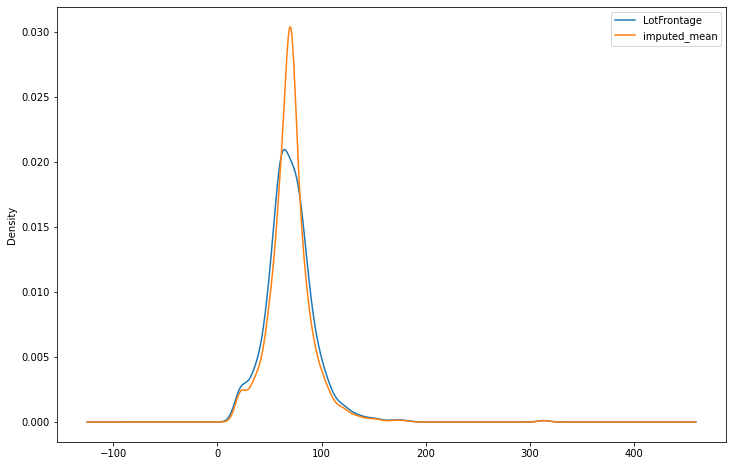

In [ ]:
# Imputation with Mean and Median

simple_imputer_mean = SimpleImputer(strategy='mean')
simple_imputer_mean.fit(feature_df)

original_mean = simple_imputer_mean.statistics_
print("Original Mean : ",original_mean)
original_variance = df[feature].var()
print('Original variable variance: ', original_variance )

fig = px.box(feature_df)

feature_df['imputed_mean'] = simple_imputer_mean.transform(feature_df)

print("--------------------------------------------------------------------------------")
print('Mean after mean imputation: ', feature_df['imputed_mean'].mean())
print('Percent change in Mean after mean imputation: ', (feature_df['imputed_mean'].mean()-original_mean)*100/original_mean)
print("Variance after mean imputation", feature_df['imputed_mean'].var())
print('Percent change in Variance after mean imputation: ', (feature_df['imputed_mean'].var()-original_variance)*100/original_variance) 
print("--------------------------------------------------------------------------------")

# plotting multiple density plot
feature_df.plot.kde(figsize = (12, 8),linewidth = 1.5)
# plotting the boxplot
fig = px.box(feature_df)
fig.show()

In [ ]:
!pip install feature_engine
import feature_engine
from feature_engine.outliers import Winsorizer
# set up the capper
capper = Winsorizer(capping_method='iqr', fold=3, variables=feature, missing_values='ignore')
# fit the capper
capper.fit(feature_df[[feature]])
# transform the data
feature_df['removed_outliers'] = capper.transform(feature_df[[feature]])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fig = px.box(feature_df)
fig.show()

__Feature Name__ : __LotArea__ <br>
***
__Description__ : It is the measurement of the length of a plot of land or a building facing the
main road on to which the plot or building fronts.<br>
__Data Type__ : Numeric (Continuous)<br>
__Correlation__ : No <br>
__Missing_Values__ : Absent

In [ ]:
feature = "LotArea"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  LotArea    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __Street__ <br>
***
__Description__ : Type of road access to property <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

       Grvl	Gravel	
       Pave	Paved
       	

In [ ]:
feature = "Street"
feature_df = df[[feature]]
print(feature_df[feature].unique())
px.histogram(feature_df)

['Pave' 'Grvl']


In [ ]:
one_hot = OneHotEncoder(drop_last=True)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1)

__Feature Name__ : __Alley__ <br>
***
__Description__ : It is the measurement of the length of a plot of land or a building facing the
main road on to which the plot or building fronts.<br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access


In [ ]:
feature = "Alley"
feature_df = df[[feature]]
from feature_engine.imputation import CategoricalImputer
simple_imputer_constant = CategoricalImputer(imputation_method='missing',fill_value='No_'+feature)
# simple_imputer_constant = SimpleImputer(strategy='constant', fill_value='No_'+feature)
simple_imputer_constant.fit(feature_df)
feature_df = simple_imputer_constant.transform(feature_df)
px.histogram(feature_df)

In [ ]:
one_hot = OneHotEncoder(drop_last=True)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
# Data_Test[[feature]] = simple_imputer_constant.transform( Data_Test[[feature]] )

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)

feature_df = Data_Test[[feature]]
feature_df = simple_imputer_constant.transform(feature_df)
feature_df = one_hot.transform(feature_df)
Cat_df_Test = pd.concat([Cat_df_Test,feature_df],axis=1)

__Feature Name__ : __LotShape__ <br>
***
__Description__ : General shape of property <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [ ]:
feature = "LotShape"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Reg' 'IR1' 'IR2' 'IR3']


In [ ]:
one_hot = OneHotEncoder(drop_last=True)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1)

__Feature Name__ : __LandContour__ <br>
***
__Description__ :  Flatness of the property <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		

In [ ]:
feature = "LandContour"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Lvl' 'Bnk' 'Low' 'HLS']


In [ ]:
one_hot = OneHotEncoder(drop_last=True)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1)

__Feature Name__ : __Utilities__ <br>
***
__Description__ : Type of utilities available <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	

In [ ]:
feature = "Utilities"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['AllPub' 'NoSeWa']


In [ ]:
feature_df[feature_df['Utilities']=='NoSeWa']
# Category "NoSeWa" occured only once, it means this feature is not providing any information and it will be dropped

,Utilities
944,NoSeWa


In [ ]:
# one_hot = OneHotEncoder(drop_last=True)
# feature_df = one_hot.fit_transform(feature_df)

# Cat_df = pd.concat([Cat_df,feature_df],axis=1)
# Cat_df

# pipeline_Utilities = Pipeline([  ("One Hot Encoder", OneHotEncoder(drop_last=True))  ])

__Feature Name__ : __LotConfig__ <br>
***
__Description__ : Lot configuration <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent
    
       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	

In [ ]:
feature = "LotConfig"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


In [ ]:
one_hot = OneHotEncoder(top_categories=3)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1)

__Feature Name__ : __LandSlope__ <br>
***
__Description__ : Slope of property <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	

In [ ]:
feature = "LandSlope"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Gtl' 'Mod' 'Sev']


In [ ]:
one_hot = OneHotEncoder(drop_last=True)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)
feature_df.head()

,LandSlope_Gtl,LandSlope_Mod
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1)

__Feature Name__ : __Neighborhood__ <br>
***
__Description__ : Physical locations within Ames city limits <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			

In [ ]:
feature = "Neighborhood"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [ ]:
# This feature will be dropped as it contains a lot of 'Non-Ranked' Categories, otherwise it will create many columns after one hot encoding

In [ ]:
# one_hot = OneHotEncoder(drop_last=True)
# feature_df = one_hot.fit_transform(feature_df)
# feature_df.head()

# Cat_df = pd.concat([Cat_df,feature_df],axis=1)
# Cat_df

# pipeline_Neighborhood = Pipeline([  ("One Hot Encoder", OneHotEncoder(drop_last=True))  ])

__Feature Name__ : __Condition1__ <br>
***
__Description__ : Proximity to various conditions <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent
    
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	

In [ ]:
feature = "Condition1"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


In [ ]:
one_hot = OneHotEncoder(top_categories=3)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1)

__Feature Name__ : __Condition2__ <br>
***
__Description__ : Proximity to various conditions (if more than one is present) <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	

In [ ]:
feature = "Condition2"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


In [ ]:
one_hot = OneHotEncoder(top_categories=1)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1)

__Feature Name__ : __BldgType__ <br>
***
__Description__ : Type of dwelling <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	

In [ ]:
feature = "BldgType"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


In [ ]:
one_hot = OneHotEncoder(drop_last=True)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1)

__Feature Name__ : __HouseStyle__ <br>
***
__Description__ : Style of dwelling <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	

In [ ]:
feature = "HouseStyle"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


In [ ]:
one_hot = OneHotEncoder(top_categories=4)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1)

__Feature Name__ : __OverallQual__ <br>
***
__Description__ : Rates the overall material and finish of the house <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent
    
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	

In [ ]:
feature = "OverallQual"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

[ 7  6  8  5  9  4 10  3  1  2]


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, Data_Test[[feature]]],axis=1)

__Feature Name__ : __YearBuilt__ <br>
***
__Description__ : Original construction date. <br>
__Data Type__ : Numeric (Discrete) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

In [ ]:
feature = "YearBuilt"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  YearBuilt    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __YearRemodAdd__ <br>
***
__Description__ : Remodel date (same as construction date if no remodeling or additions)<br>
__Data Type__ : Numeric (Discrete) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent <br>

In [ ]:
feature = "YearRemodAdd"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  YearRemodAdd    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __OverallCond__ <br>
***
__Description__ : Rates the overall condition of the house <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent
    
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	

In [ ]:
feature = "OverallCond"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

[5 8 6 7 4 2 3 9 1]


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, Data_Test[[feature]]],axis=1) 

__Feature Name__ : __RoofStyle__ <br>
***
__Description__ : Type of roof <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent
    

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		

In [ ]:
feature = "RoofStyle"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


In [ ]:
one_hot = OneHotEncoder(top_categories=2)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __RoofMatl__ <br>
***
__Description__ :  Roof material <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent


       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		

In [ ]:
feature = "RoofMatl"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


In [ ]:
one_hot = OneHotEncoder(top_categories=1)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __Exterior1st__ <br>
***
__Description__ : Exterior covering on house <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	

In [ ]:
feature = "Exterior1st"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [ ]:
one_hot = OneHotEncoder(top_categories=7)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Data_Test[feature].fillna(value=Data_Test[feature].mode().values[0],inplace=True)
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __Exterior2nd__ <br>
***
__Description__ : Exterior covering on house (if more than one material) <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	

In [ ]:
feature = "Exterior2nd"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


In [ ]:
one_hot = OneHotEncoder(top_categories=7)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value=Data_Test[feature].mode().values[0],inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __MasVnrType__ <br>
***
##### Need Review
__Description__ : Masonry veneer type<br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present (Need Imputation)

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	

In [ ]:
feature = "MasVnrType"
feature_df = df[[feature]]
print(feature_df[feature].unique())
feature_df.fillna('None',inplace=True)  ## 8 Null Values are imputed with median of the column
px.histogram(feature_df)

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


In [ ]:
one_hot = OneHotEncoder(drop_last=True)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='None',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __MasVnrArea__ <br>
***
__Description__ : It is the measurement of the length of a plot of land or a building facing the
main road on to which the plot or building fronts.<br>
__Data Type__ : Numeric (Continuous) <br>
__Correlation__ : No <br>
__Missing_Values__ : Present <br>
__Change_in_Distribution_after_imputing_null_values_with_mean__ : Acceptable (Neglible change in variance)

# of missing values =  MasVnrArea    8
dtype: int64
--------------------------------------------------------------------------------
Original Mean :  [103.68526171]
Original variable variance:  32784.9711678846
--------------------------------------------------------------------------------
Mean after mean imputation:  103.68526170798899
Percent change in Mean after mean imputation:  [0.]
Variance after mean imputation 32605.204362303324
Percent change in Variance after mean imputation:  -0.5483207676490836
--------------------------------------------------------------------------------


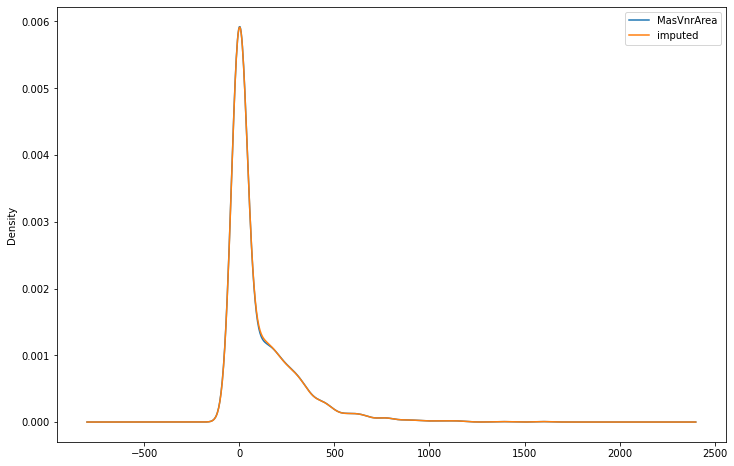

In [ ]:
# Imputation with Mean and Median
feature = "MasVnrArea"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

simple_imputer_mean = SimpleImputer(strategy='mean')
simple_imputer_mean.fit(feature_df)

original_mean = simple_imputer_mean.statistics_
print("Original Mean : ",original_mean)
original_variance = df[feature].var()
print('Original variable variance: ', original_variance )

fig = px.box(feature_df)

feature_df['imputed'] = simple_imputer_mean.transform(feature_df)

print("--------------------------------------------------------------------------------")
print('Mean after mean imputation: ', feature_df['imputed'].mean())
print('Percent change in Mean after mean imputation: ', (feature_df['imputed'].mean()-original_mean)*100/original_mean)
print("Variance after mean imputation", feature_df['imputed'].var())
print('Percent change in Variance after mean imputation: ', (feature_df['imputed'].var()-original_variance)*100/original_variance) 
print("--------------------------------------------------------------------------------")

# plotting multiple density plot
feature_df.plot.kde(figsize = (12, 8),linewidth = 1.5)
# plotting the boxplot
fig = px.box(feature_df)
fig.show()
    


__Feature Name__ : __ExterQual__ <br>
***
__Description__ : Evaluates the quality of the material on the exterior  <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [ ]:
feature = "ExterQual"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Gd' 'TA' 'Ex' 'Fa']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Fa','TA','Gd','Ex']])
ord_end.fit(feature_df)
feature_df = ord_end.transform(feature_df)
feature_df = pd.DataFrame(feature_df,columns=[feature])

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __ExterCond__ <br>
***
__Description__ : Evaluates the present condition of the material on the exterior <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent
    
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [ ]:
feature = "ExterCond"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['TA' 'Gd' 'Fa' 'Po' 'Ex']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']])
ord_end.fit(feature_df)
feature_df = ord_end.transform(feature_df)
feature_df = pd.DataFrame(feature_df,columns=[feature])
px.histogram(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __Foundation__ <br>
***
__Description__ : Type of foundation <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent
    
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		

In [ ]:
feature = "Foundation"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


In [ ]:
one_hot = OneHotEncoder(top_categories=3)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 


__Feature Name__ : __BsmtQual__ <br>
***
__Description__ : Evaluates the height of the basement <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement



In [ ]:
feature = "BsmtQual"
feature_df = pd.DataFrame(df[feature])
px.histogram(feature_df)

In [ ]:
feature_df.fillna('Na',inplace=True)
px.histogram(feature_df)

In [ ]:
ord_end = OrdinalEncoder(categories=[["Na","Po","Fa","TA","Gd","Ex"]] )
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __BsmtCond__ <br>
***
__Description__ : Evaluates the height of the basement <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement


In [ ]:
feature = "BsmtCond"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['TA' 'Gd' 'Na' 'Fa' 'Po']


In [ ]:
ord_end = OrdinalEncoder(categories=[["Na","Po","Fa","TA","Gd","Ex"]])
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __BsmtExposure__ <br>
***
__Description__ : Basement Exposure refers to walkout or garden level walls <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement


In [ ]:
feature = "BsmtExposure"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("No",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['No' 'Gd' 'Mn' 'Av']


In [ ]:
ord_end = OrdinalEncoder(categories=[['No','Mn','Av','Gd']])
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])
px.histogram(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='No',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __BsmtFinType1__ <br>
***
__Description__ : Rating of basement finished area <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [ ]:
feature = "BsmtFinType1"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'Na' 'LwQ']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Na','Unf',"LwQ","Rec","BLQ","ALQ","GLQ"]])
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __BsmtFinSF1__ <br>
***
__Description__ : It is the measurement of the length of a plot of land or a building facing the
main road on to which the plot or building fronts.<br>
__Data Type__ : Numeric (Continuous)<br>
__Correlation__ : No <br>
__Missing_Values__ : Absent


In [ ]:
feature = "BsmtFinSF1"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  BsmtFinSF1    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __BsmtFinType2__ <br>
***
__Description__ : Basement Exposure refers to walkout or garden level walls <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


In [ ]:
feature = "BsmtFinType2"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['Unf' 'BLQ' 'Na' 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Na','Unf',"LwQ","Rec","BLQ","ALQ","GLQ"]])
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])
px.histogram(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __BsmtFinSF2__ <br>
***
__Description__ :Type 2 finished square feet <br>
__Data Type__ : Numeric (Continuous) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent


In [ ]:
feature = "BsmtFinSF2"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  BsmtFinSF2    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __BsmtUnfSF__ <br>
***
__Description__ : Unfinished square feet of basement area <br>
__Data Type__ : Numeric (Continuous) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent


In [ ]:
feature = "BsmtUnfSF"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  BsmtUnfSF    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __TotalBsmtSF__ <br>
***
__Description__ : Total square feet of basement area <br>
__Data Type__ : Numeric (Continuous)<br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "TotalBsmtSF"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")


# of missing values =  TotalBsmtSF    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __Heating__ <br>
***
__Description__ :Type of heating <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		

In [ ]:
feature = "Heating"
feature_df = pd.DataFrame(df[feature])
px.histogram(feature_df)

In [ ]:
one_hot = OneHotEncoder(top_categories=1)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)
feature_df.head()

,Heating_GasA
0,1
1,1
2,1
3,1
4,1


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __HeatingQC__ <br>
***
__Description__ : Heating quality and condition <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

In [ ]:
feature = "HeatingQC"
feature_df = pd.DataFrame(df[feature])
px.histogram(feature_df)

In [ ]:
one_hot = OneHotEncoder(top_categories=3)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __CentralAir__ <br>
***
__Description__ : Central Air Conditioning <br>
__Data Type__ : Categorical (Binary , ranked ) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent


       N	No
       Y	Yes
		

In [ ]:
feature = "CentralAir"
feature_df = pd.DataFrame(df[feature])
px.histogram(feature_df)

In [ ]:
one_hot = OneHotEncoder(drop_last=True)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __Electrical__ <br>
***
__Description__ : Basement Exposure refers to walkout or garden level walls <br>
__Data Type__ : Categorical (Not Ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present
    
       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [ ]:
feature = "Electrical"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'Na']


In [ ]:
one_hot = OneHotEncoder(top_categories=2)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __1stFlrSF__ <br>
***
__Description__ : First Floor square feet <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent

In [ ]:
feature = "1stFlrSF"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  1stFlrSF    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __2ndFlrSF__ <br>
***
__Description__ : Second Floor square feet <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "2ndFlrSF"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")


# of missing values =  2ndFlrSF    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __LowQualFinSF__ <br>
***
__Description__ : Low quality finished square feet (all floors) <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "LowQualFinSF"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  LowQualFinSF    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __GrLivArea__ <br>
***
__Description__ : Above grade (ground) living area square feet <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent
    

In [ ]:
feature = "GrLivArea"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")


# of missing values =  GrLivArea    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __BsmtFullBath__ <br>
***
__Description__ : Basement full bathrooms<br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

In [ ]:
feature = "BsmtFullBath"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

[1 0 2 3]


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, Data_Test[[feature]]] ,axis=1) 

__Feature Name__ : __BsmtHalfBath__ <br>
***
__Description__ : Basement half bathrooms <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

In [ ]:
feature = "BsmtHalfBath"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

[0 1 2]


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, Data_Test[[feature]]] ,axis=1) 

__Feature Name__ : __FullBath__ <br>
***
__Description__ : Full bathrooms above grade <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

In [ ]:
feature = "FullBath"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

[2 1 3 0]


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, Data_Test[[feature]]] ,axis=1) 

__Feature Name__ : __HalfBath__ <br>
***
__Description__ : Half baths above grade <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

In [ ]:
feature = "HalfBath"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

[1 0 2]


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, Data_Test[[feature]]] ,axis=1) 

__Feature Name__ : __BedroomAbvGr__ <br>
***
##### Need Review
__Description__ : Bedrooms above grade (does NOT include basement bedrooms) <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

In [ ]:
feature = "BedroomAbvGr"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

[3 4 1 2 0 5 6 8]


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, Data_Test[[feature]]] ,axis=1) 

__Feature Name__ : __KitchenAbvGr__ <br>
***
##### Need Review
__Description__ : Kitchens above grade <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

In [ ]:
feature = "KitchenAbvGr"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

[1 2 3 0]


In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, Data_Test[[feature]]] ,axis=1) 

__Feature Name__ : __KitchenQual__ <br>
***
__Description__ : Kitchen quality <br>
__Data Type__ : Categorical (ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent


       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	

In [ ]:
feature = "KitchenQual"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Gd' 'TA' 'Ex' 'Fa']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Po','Fa','TA','Gd','Ex']])
ord_end.fit(feature_df)
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])
px.histogram(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value=Data_Test[feature].mode().values[0],inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __TotRmsAbvGrd__ <br>
***
__Description__ : Total rooms above grade (does not include bathrooms) <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent
    

In [ ]:
feature = "TotRmsAbvGrd"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")


# of missing values =  TotRmsAbvGrd    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __Functional__ <br>
***
__Description__ : Home functionality (Assume typical unless deductions are warranted) <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent


       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		

In [ ]:
feature = "Functional"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


In [ ]:
one_hot = OneHotEncoder(top_categories=3)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value=Data_Test[feature].mode().values[0],inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __Fireplaces__ <br>
***
__Description__ : <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "Fireplaces"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")


# of missing values =  Fireplaces    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __FireplaceQu__ <br>
***
__Description__ : Fireplace quality <br>
__Data Type__ : Categorical (Ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present
    
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [ ]:
feature = "FireplaceQu"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['Na' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Na',"Po","Fa","TA","Gd","Ex"]])
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __GarageType__ <br>
***
__Description__ : Garage location <br>
__Data Type__ : Categorical (Not Ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present
    
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [ ]:
feature = "GarageType"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Na' 'Basment' '2Types']


In [ ]:
one_hot = OneHotEncoder(top_categories=4)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)
#feature_df.drop(columns=['GarageType_Na'],inplace=True)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __GarageYrBlt__ <br>
***
__Description__ : Year garage was built <br>
__Data Type__ : Numeric (Discrete) <br>
__Correlation__ : <br>
__Missing_Values__ : Present

__Change_in_Distribution_after_imputing_null_values_with_median__ : Acceptable (but try other methods also)
  

# of missing values =  GarageYrBlt    81
dtype: int64
--------------------------------------------------------------------------------
Original Median :  [1980.]
Original variable variance:  609.5825091487385
--------------------------------------------------------------------------------
Median after median imputation:  1980.0
Percent change in Median after median imputation:  [0.]
Variance after median imputation 575.8570422601331
Percent change in Variance after median imputation:  -5.532551604162969
--------------------------------------------------------------------------------


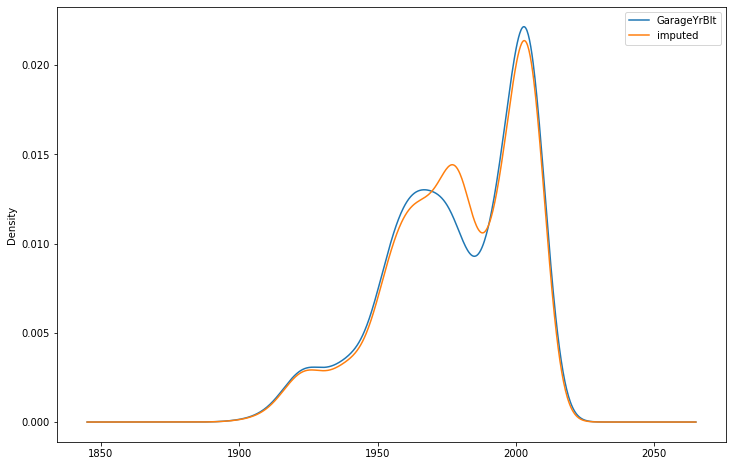

In [ ]:
# Imputation with Mean and Median
feature = "GarageYrBlt"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

simple_imputer_median = SimpleImputer(strategy='median')
simple_imputer_median.fit(feature_df)

original_median = simple_imputer_median.statistics_
print("Original Median : ",original_median)
original_variance = df[feature].var()
print('Original variable variance: ', original_variance )

fig = px.box(feature_df)

feature_df['imputed'] = simple_imputer_median.transform(feature_df)

print("--------------------------------------------------------------------------------")
print('Median after median imputation: ', feature_df['imputed'].median())
print('Percent change in Median after median imputation: ', (feature_df['imputed'].median()-original_median)*100/original_median)
print("Variance after median imputation", feature_df['imputed'].var())
print('Percent change in Variance after median imputation: ', (feature_df['imputed'].var()-original_variance)*100/original_variance) 
print("--------------------------------------------------------------------------------")

# plotting multiple density plot
feature_df.plot.kde(figsize = (12, 8),linewidth = 1.5)
# plotting the boxplot
fig = px.box(feature_df)
fig.show()

__Feature Name__ : __GarageFinish__ <br>   
***
##### Need Review
__Description__ : Interior finish of the garage <br>
__Data Type__ : Categorical (Ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present
    
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [ ]:
feature = "GarageFinish"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['RFn' 'Unf' 'Fin' 'Na']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Unf','Fin','RFn','Na']])
ord_end.fit(feature_df)
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __GarageCars__ <br>
***
__Description__ : Size of garage in car capacity<br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "GarageCars"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  GarageCars    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __GarageArea__ <br>
***
__Description__ : Size of garage in square feet<br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent
    

In [ ]:
feature = "GarageArea"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")


# of missing values =  GarageArea    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __GarageQual__ <br>   
***
__Description__ : Garage quality <br>
__Data Type__ : Categorical (Ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present

       Ex	Excellent
       Gd	Good	
       TA	Typical/Average
       Fa	Fair
       Po   Poor
       NA   No Garage

In [ ]:
feature = "GarageQual"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['TA' 'Fa' 'Gd' 'Na' 'Ex' 'Po']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Na','Po',"Fa","TA","Gd","Ex"]])
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __GarageCond__ <br>   
***
__Description__ : Garage condition <br>
__Data Type__ : Categorical (Ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present
    
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
feature = "GarageCond"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['TA' 'Fa' 'Na' 'Gd' 'Po' 'Ex']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Na',"Po","Fa","TA","Gd","Ex"]])
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

In [ ]:
fig = px.scatter(x=df['GarageCond'],y=df['GarageQual'])
fig.show()

# They are not coorelated

__Feature Name__ : __PavedDrive__ <br>
***
__Description__ : Paved driveway <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent
    

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		

In [ ]:
feature = "PavedDrive"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Y' 'N' 'P']


In [ ]:
one_hot = OneHotEncoder(drop_last=True)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __WoodDeckSF__ <br>
***
__Description__ : Wood deck area in square feet <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "WoodDeckSF"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  WoodDeckSF    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __OpenPorchSF__ <br>
***
__Description__ : Open porch area in square feet <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "OpenPorchSF"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")


# of missing values =  OpenPorchSF    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __EnclosedPorch__ <br>
***
__Description__ : Enclosed porch area in square feet <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "EnclosedPorch"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  EnclosedPorch    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __3SsnPorch__ <br>
***
__Description__ : Three season porch area in square feet <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent

In [ ]:
feature = "3SsnPorch"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")


# of missing values =  3SsnPorch    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __ScreenPorch__ <br>
***
__Description__ : Screen porch area in square feet <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "ScreenPorch"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")


# of missing values =  ScreenPorch    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __PoolArea__ <br>
***
__Description__ : Pool area in square feet<br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "PoolArea"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  PoolArea    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __PoolQC__ <br>   
***
__Description__ : Pool quality <br>
__Data Type__ : Categorical (Ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present <br>

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       NA	No Pole

In [ ]:
feature = "PoolQC"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['Na' 'Ex' 'Fa' 'Gd']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Na',"Fa","TA","Gd","Ex"]])
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __Fence__ <br>   
***
__Description__ : Fence quality <br>
__Data Type__ : Categorical (Ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present <br>

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	  Good Wood
       MnWw   Minimum Wood/Wire
       NA    No Fence

In [ ]:
feature = "Fence"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Na",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['Na' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [ ]:
ord_end = OrdinalEncoder(categories=[['Na',"MnWw","GdWo","MnPrv","GdPrv"]])
ord_end.fit( feature_df )
feature_df = pd.DataFrame(ord_end.transform(feature_df),columns=[feature])
px.histogram(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, pd.DataFrame(ord_end.transform(Data_Test[[feature]]),columns=[feature])],axis=1) 

__Feature Name__ : __MiscFeature__ <br>   
***
__Description__ : Miscellaneous feature not covered in other categories <br>
__Data Type__ : Categorical (Not Ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Present <br>

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [ ]:
feature = "MiscFeature"
feature_df = pd.DataFrame(df[feature])

feature_df.fillna("Empty",inplace=True)
print(feature_df[feature].unique())
px.histogram(feature_df)

['Empty' 'Shed' 'Gar2' 'Othr' 'TenC']


In [ ]:
one_hot = OneHotEncoder(top_categories=2)
one_hot.fit( feature_df )
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value='Na',inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __MiscVal__ <br>
***
__Description__ : $Value of miscellaneous feature <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent

In [ ]:
feature = "MiscVal"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  MiscVal    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __MoSold__ <br>
***
__Description__ : Month Sold (MM) <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "MoSold"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  MoSold    0
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __YrSold__ <br>
***
__Description__ : Year Sold (YYYY) <br>
__Data Type__ : Numeric <br>
__Correlation__ : <br>
__Missing_Values__ : Absent


In [ ]:
feature = "LotFrontage"
feature_df = df[[feature]]
print("# of missing values = ", feature_df.isnull().sum() )
print("--------------------------------------------------------------------------------")

# of missing values =  LotFrontage    259
dtype: int64
--------------------------------------------------------------------------------


__Feature Name__ : __SaleType__ <br>
***
##### Need Review
__Description__ : Type of sale <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent

		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		

In [ ]:
feature = "SaleType"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


In [ ]:
one_hot = OneHotEncoder(top_categories=3)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Data_Test[feature].fillna(value=Data_Test[feature].mode().values[0],inplace=True)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

__Feature Name__ : __SaleCondition__ <br>
***
##### Need Review
__Description__ : Condition of sale <br>
__Data Type__ : Categorical (Not ranked) <br>
__Correlation__ :  <br>
__Missing_Values__ : Absent


       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [ ]:
feature = "SaleCondition"
feature_df = pd.DataFrame(df[feature])
print(feature_df[feature].unique())
px.histogram(feature_df)

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [ ]:
one_hot = OneHotEncoder(top_categories=3)
one_hot.fit(feature_df)
feature_df = one_hot.transform(feature_df)

In [ ]:
Cat_df = pd.concat([Cat_df,feature_df],axis=1)
Cat_df_Test = pd.concat([Cat_df_Test, one_hot.transform(Data_Test[[feature]])],axis=1) 

In [ ]:
# Coorealation Matrix
px.imshow( Data.corr(),color_continuous_scale='RdBu_r', width=900, height=700 )

In [ ]:
Cat_df.isnull().sum()

MSSubClass               0
MSZoning_RL              0
MSZoning_RM              0
MSZoning_FV              0
Street_Pave              0
                        ..
SaleType_New             0
SaleType_COD             0
SaleCondition_Normal     0
SaleCondition_Partial    0
SaleCondition_Abnorml    0
Length: 99, dtype: int64

In [ ]:
num_df = Data[numerical_column_name]
num_df_Test = Data_Test[numerical_column_name]

In [ ]:
# px.imshow( month_year_columns_df.corr(),color_continuous_scale='RdBu_r', width=400, height=400 )

In [ ]:
# Converting 'YrSold' into month and adding it to 'MoSold'
num_df['MoYrSold'] = (num_df['YrSold']- 2006)*12 + num_df['MoSold']
num_df.drop(columns=['MoSold','YrSold'],inplace=True)

num_df_Test['MoYrSold'] = (num_df_Test['YrSold']- 2006)*12 + num_df_Test['MoSold']
num_df_Test.drop(columns=['MoSold','YrSold'],inplace=True)

numerical_column_name.remove('YrSold')
numerical_column_name.remove('MoSold')
numerical_column_name.append('MoYrSold')

In [ ]:
# Checking and dropping Basement Area Feature
# temp_df = X_train_try_num_df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
# temp_df['total']=temp_df['BsmtFinSF1'] + temp_df['BsmtFinSF2'] + temp_df['BsmtUnfSF']
num_df.drop(columns='TotalBsmtSF', inplace=True)
num_df_Test.drop(columns='TotalBsmtSF', inplace=True)
numerical_column_name.remove('TotalBsmtSF')

***

In [ ]:
# Taking the difference in Year Columns
num_df['GarageYrBlt'] = num_df['GarageYrBlt'] - num_df['YearBuilt']
num_df_Test['GarageYrBlt'] = num_df_Test['GarageYrBlt'] - num_df_Test['YearBuilt']

In [ ]:
# SF = [ '1stFlrSF', '2ndFlrSF']
# Porch = ['OpenPorchSF','EnclosedPorch','ScreenPorch','3SsnPorch']
# num_df['SF'] = num_df['1stFlrSF']+num_df['2ndFlrSF']
# num_df['Porch'] = num_df['OpenPorchSF']+num_df['EnclosedPorch']+num_df['ScreenPorch'] + num_df['3SsnPorch']

# num_df.drop(columns=SF,inplace=True)
# num_df.drop(columns=Porch,inplace=True)
# numerical_column_name = list( set(numerical_column_name) - set(Porch) - set(SF))

In [ ]:
num_df.isnull().sum()[5:10]

GarageYrBlt     81
BsmtUnfSF        0
LowQualFinSF     0
GarageArea       0
TotRmsAbvGrd     0
dtype: int64

In [ ]:
# Train Test Split
X = pd.concat( [ num_df, Cat_df ],axis=1 )
y = Data[ 'SalePrice' ]
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2, random_state=1 )

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 124), (292, 124), (1168,), (292,))

In [ ]:
df_Test = pd.concat( [ num_df_Test, Cat_df_Test],axis=1)

In [ ]:
# For adding missing values indicator
MasVnrArea_Indicator_train = ((X_train['MasVnrArea']==np.nan).values).astype(int)
GarageYrBlt_Indicator_train = ((X_train['GarageYrBlt']==np.nan).values).astype(int)
LotFrontage_Indicator_train = ((X_train['LotFrontage']==np.nan).values).astype(int)


MasVnrArea_Indicator_test = ((X_test['MasVnrArea']==np.nan).values).astype(int)
GarageYrBlt_Indicator_test = ((X_test['GarageYrBlt']==np.nan).values).astype(int)
LotFrontage_Indicator_test = ((X_test['LotFrontage']==np.nan).values).astype(int)

MasVnrArea_Indicator_Test = ((df_Test['MasVnrArea']==np.nan).values).astype(int)
GarageYrBlt_Indicator_Test = ((df_Test['GarageYrBlt']==np.nan).values).astype(int)
LotFrontage_Indicator_Test = ((df_Test['LotFrontage']==np.nan).values).astype(int)

In [ ]:
Imputer_Mean = SimpleImputer( strategy = 'mean'  )
Imputer_Mean.fit( X_train[['MasVnrArea']] )
X_train['MasVnrArea'] = Imputer_Mean.transform( X_train[['MasVnrArea']] )
X_test['MasVnrArea'] = Imputer_Mean.transform( X_test[['MasVnrArea']] )

df_Test['MasVnrArea'] = Imputer_Mean.transform( df_Test[['MasVnrArea']] )

In [ ]:
Imputer_Median = SimpleImputer( strategy = 'median' )
Imputer_Mean.fit( X_train[['GarageYrBlt']] )
X_train['GarageYrBlt'] = Imputer_Mean.transform( X_train[['GarageYrBlt']] )
X_test['GarageYrBlt'] = Imputer_Mean.transform( X_test[['GarageYrBlt']] )

df_Test['GarageYrBlt'] = Imputer_Mean.transform( df_Test[['GarageYrBlt']] )

In [ ]:
X_train

,MiscVal,ScreenPorch,3SsnPorch,2ndFlrSF,OpenPorchSF,GarageYrBlt,BsmtUnfSF,LowQualFinSF,GarageArea,TotRmsAbvGrd,PoolArea,BsmtFinSF2,GrLivArea,LotArea,MasVnrArea,BsmtFinSF1,LotFrontage,YearBuilt,YearRemodAdd,1stFlrSF,Fireplaces,EnclosedPorch,GarageCars,WoodDeckSF,MoYrSold,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_FV,Street_Pave,Alley_No_Alley,Alley_Grvl,LotShape_Reg,LotShape_IR1,LotShape_IR2,LandContour_Lvl,LandContour_Bnk,LandContour_Low,LotConfig_Inside,LotConfig_Corner,LotConfig_CulDSac,LandSlope_Gtl,LandSlope_Mod,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition2_Norm,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,OverallQual,OverallCond,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_VinylSd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual,ExterCond,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating_GasA,HeatingQC_Ex,HeatingQC_TA,HeatingQC_Gd,CentralAir_Y,Electrical_SBrkr,Electrical_FuseA,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional_Typ,Functional_Min2,Functional_Min1,FireplaceQu,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_Na,GarageFinish,GarageQual,GarageCond,PavedDrive_Y,PavedDrive_N,PoolQC,Fence,MiscFeature_Empty,MiscFeature_Shed,SaleType_WD,SaleType_New,SaleType_COD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml
921,0,0,0,928,70,5.419151,188,0,0,9,0,0,2200,8777,0.0,1084,67.0,1900,2003,1272,0,0,0,0,33,11,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,5,7,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,2.0,0,1,0,3.0,3.0,0.0,5.0,1.0,1,0,0,1,1,1,0,2,0,2,2,4,2,2.0,1,0,0,0.0,0,0,0,1,3.0,0.0,0.0,0,1,0.0,4.0,1,0,1,0,0,1,0,0
520,0,0,0,600,114,5.419151,0,0,0,7,0,0,1294,10800,0.0,0,60.0,1900,2000,694,0,210,0,220,32,16,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,4,7,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,2.0,0,0,1,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0,2,0,3,2,2.0,1,0,0,0.0,0,0,0,1,3.0,0.0,0.0,0,1,0.0,0.0,1,0,1,0,0,1,0,0
401,0,0,0,0,0,0.000000,1286,0,400,6,0,0,1310,8767,0.0,24,65.0,2005,2005,1310,1,0,2,0,7,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,7,5,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2.0,2.0,1,0,0,4.0,3.0,2.0,6.0,1.0,1,1,0,0,1,1,0,0,0,2,0,3,1,3.0,1,0,0,4.0,1,0,0,0,1.0,3.0,3.0,1,0,0.0,0.0,1,0,0,1,0,0,1,0
280,0,0,196,807,84,0.000000,386,0,575,7,0,0,1982,11287,340.0,421,82.0,1989,1989,1175,1,0,2,0,13,6,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,7,6,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,2.0,2.0,0,1,0,4.0,3.0,2.0,6.0,1.0,1,0,0,1,1,1,0,0,0,2,1,3,1,3.0,1,0,0,3.0,1,0,0,0,1.0,3.0,3.0,1,0,0.0,0.0,1,0,1,0,0,1,0,0
1401,0,0,0,729,75,0.000000,80,0,398,8,0,0,1593,7415,0.0,759,62.0,2004,2004,864,1,0,2,100,28,6,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,6,5,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0,2.0,1,0,0,3.0,3.0,0.0,6.0,1.0,1,1,0,0,1,1,0,1,0,2,1,3,1,2.0,1,0,0,3.0,1,0,0,0,1.0,3.0,3.0,1,0,0.0,0.0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,0,0,0,0.000000,1064,0,478,7,0,0,1350,10140,174.0,0,78.0,1974,1974,1350,1,0,2,0,44,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0

In [ ]:
# # Correcting Columns Missing
# # Error ------------------------------------
      # The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
      # Feature names unseen at fit time:
      # - Alley_Pave
      # - BldgType_Twnhs
      # - GarageType_Na
      # - LandContour_HLS
      # - MiscFeature_Na
      # Feature names seen at fit time, yet now missing:
      # - Alley_Grvl
      # - BldgType_2fmCon
      # - LandContour_Low
# # ------------------------------------------

## Correction :
# mismatched_columns = set.union(set( df_Test.columns ),set( X_train.columns )) - set.intersection(set( df_Test.columns ),set( X_train.columns ))
# mismatched_columns_in_df_Test =  mismatched_columns - set( X_train.columns )
# mismatched_columns_in_X_train =  mismatched_columns - set( df_Test.columns )

# df_Test.drop( columns=list(mismatched_columns_in_df_Test),inplace=True ) # Coz the model is not trained on these two features
# for feature in mismatched_columns_in_X_train:
#   df_Test[feature] = np.zeros(df_Test.shape[0])

# X_train.shape, df_Test.shape

Iterative Imputation of Column with large number of missing values

[07:07:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

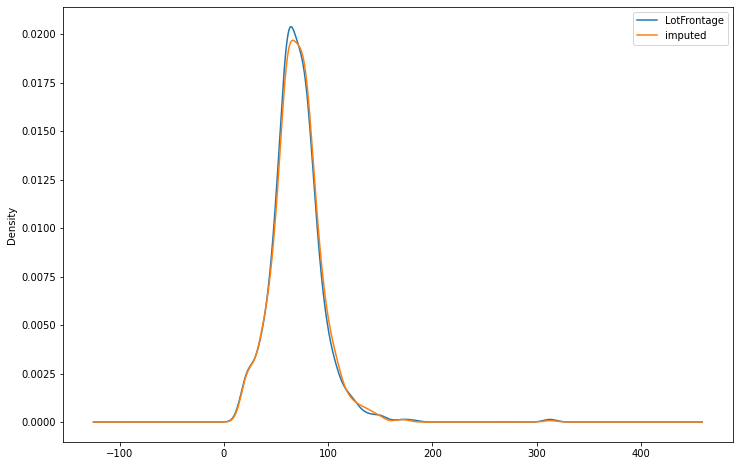

In [ ]:
model = XGBRegressor()
imputer_RFR = IterativeImputer( estimator=model, max_iter=5, random_state=10 ) 
imputer_RFR.fit(X_train)
imputed = imputer_RFR.transform(X_train)
imputed_X_train = pd.DataFrame(imputed, columns=X_train.columns)

# Comparision of Original and Imputed Values
feature = ['LotFrontage']
feature_df = pd.DataFrame()
feature_df[feature] = X_train[feature]
feature_df['imputed'] = imputed_X_train[feature]

original_mean = feature_df[feature].mean()
print("Original Mean : ",original_mean)
original_variance = X_train[feature].var()
print('Original variable variance: ', original_variance )

fig = px.box(feature_df)

print("--------------------------------------------------------------------------------")
print('Mean after mean imputation: ', feature_df['imputed'].mean())
print('Percent change in Mean after imputation: ', (feature_df['imputed'].mean()-original_mean)*100/original_mean)
print("Variance after mean imputation", feature_df['imputed'].var())
print('Percent change in Variance after imputation: ', (feature_df['imputed'].var()-original_variance)*100/original_variance) 
print("--------------------------------------------------------------------------------")


# plotting multiple density plot
feature_df.plot.kde(figsize = (12, 8),linewidth = 1.5)
# plotting the boxplot
fig = px.box(feature_df)
fig.show()

X_train = imputed_X_train.copy()

imputed_test = imputer_RFR.transform(X_test)
X_test = pd.DataFrame(imputed_test, columns=X_test.columns)

imputed_Test = imputer_RFR.transform(df_Test)
df_Test = pd.DataFrame(imputed_Test, columns=df_Test.columns)


In [ ]:
# imputer_mean = SimpleImputer( strategy = 'mean'  )
# imputer_mean.fit(X_train)
# imputed = imputer_mean.transform(X_train)
# imputed_X_train = pd.DataFrame(imputed, columns=X_train.columns)

# # Comparision of Original and Imputed Values

# feature = ['LotFrontage']
# feature_df = pd.DataFrame()
# feature_df[feature] = X_train[feature]
# feature_df['imputed'] = imputed_X_train[feature]

# original_mean = feature_df[feature].mean()
# print("Original Mean : ",original_mean)
# original_variance = X_train[feature].var()
# print('Original variable variance: ', original_variance )

# fig = px.box(feature_df)

# print("--------------------------------------------------------------------------------")
# print('Mean after mean imputation: ', feature_df['imputed'].mean())
# print('Percent change in Mean after imputation: ', (feature_df['imputed'].mean()-original_mean)*100/original_mean)
# print("Variance after mean imputation", feature_df['imputed'].var())
# print('Percent change in Variance after imputation: ', (feature_df['imputed'].var()-original_variance)*100/original_variance) 
# print("--------------------------------------------------------------------------------")

# # plotting multiple density plot
# feature_df.plot.kde(figsize = (12, 8),linewidth = 1.5)
# # plotting the boxplot
# fig = px.box(feature_df)
# fig.show()

# X_train = imputed_X_train.copy()

# imputed_test = imputer_mean.transform(X_test)
# X_test = pd.DataFrame(imputed_test, columns=X_test.columns)

In [ ]:
X_train['MasVnrArea_Indicator_1'] = MasVnrArea_Indicator_train
X_train['GarageYrBlt_Indicator_1'] = GarageYrBlt_Indicator_train
X_train['LotFrontage_Indicator_1'] = LotFrontage_Indicator_train

X_test['MasVnrArea_Indicator_1'] = MasVnrArea_Indicator_test
X_test['GarageYrBlt_Indicator_1'] = GarageYrBlt_Indicator_test
X_test['LotFrontage_Indicator_1'] = LotFrontage_Indicator_test

df_Test['MasVnrArea_Indicator_1'] = MasVnrArea_Indicator_Test
df_Test['GarageYrBlt_Indicator_1'] = GarageYrBlt_Indicator_Test
df_Test['LotFrontage_Indicator_1'] = LotFrontage_Indicator_Test

Change in mean and variance after 'Mean Value' is greater than in the case of Iterative Imputation and Performance of model is almost same when missing values are Imputed with Mean Value or using Iterative Imputer

In [ ]:
X_train[['LotFrontage']].isnull().sum()

LotFrontage    0
dtype: int64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, df_Test.shape

((1168, 127), (292, 127), (1168,), (292,), (1459, 127))

In [ ]:
X_train_try = X_train.copy()
X_test_try = X_test.copy()
X_train_try_num_df = X_train_try[numerical_column_name]
X_test_try_num_df = X_test_try[numerical_column_name]

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
i=0
fig = make_subplots( rows=1, cols=X_train_try_num_df.shape[1],subplot_titles=X_train_try_num_df.columns.values )
for feature in X_train_try_num_df.columns.values:
  fig.add_trace( go.Histogram( x=X_train_try_num_df[feature],nbinsx=100,name=feature), row=1,col=i+1 )
  i = i+1

fig.update_layout( width=20000 )
fig.show()

In [ ]:
px.imshow( X_train_try_num_df.corr(),color_continuous_scale='RdBu_r', width=800, height=800 )

In [ ]:
# ## Box Cox Transformstion
# from sklearn.preprocessing import PowerTransformer
# PT = PowerTransformer( method='yeo-johnson', standardize=True )
# PT.fit(X_train_try_num_df)
# X_train_try[numerical_column_name] = PT.transform( X_train_try_num_df )
# X_test_try[numerical_column_name] = PT.transform( X_test_try_num_df )

On applying PowerTransformer performance of all the algorithms decreases, maybe it is because a large number of numerical columns contains values (0) indicating that this Features is not present in corresponding houses ( they have highly skewed distribution function )

In [ ]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
RS.fit(X_train_try_num_df)

X_train_try[numerical_column_name] = RS.transform( X_train_try_num_df )
X_test_try[numerical_column_name] = RS.transform( X_test_try_num_df )
df_Test[numerical_column_name] = RS.transform( df_Test[numerical_column_name] )

In [ ]:
# from sklearn.preprocessing import KBinsDiscretizer

# columns_names_temp = [ '1stFlrSF', 'GrLivArea', 'EnclosedPorch', 'LotArea', "TotRmsAbvGrd", 'BsmtFinSF2','GarageArea', 'MiscVal', 'LowQualFinSF', '2ndFlrSF', 'PoolArea', 'BsmtFinSF1',
#                       'ScreenPorch', '3SsnPorch', 'WoodDeckSF', 'BsmtFinSF1','OpenPorchSF', 'MasVnrArea' ]

# disc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
# disc.fit(X_train_try[columns_names_temp])
# print( disc.bin_edges_ )


# temp_df = pd.DataFrame( disc.transform( X_train_try[columns_names_temp] ), columns=columns_names_temp)
# X_train_try.drop( columns=columns_names_temp, inplace=True )
# X_train_try = pd.concat( [X_train_try,temp_df],axis=1 )

# temp_df = pd.DataFrame( disc.transform( X_test_try_num_df[columns_names_temp] ), columns=columns_names_temp)
# X_test_try.drop( columns=columns_names_temp, inplace=True )
# X_test_try = pd.concat( [X_test_try,temp_df],axis=1 )

# # temp_df =  pd.DataFrame( disc.transform( df_Test[columns_names_temp]) , columns=columns_names_temp )
# # df_Test.drop( columns=columns_names_temp, inplace=True )
# # df_Test = pd.concat( [df_Test,temp_df],axis=1 )

In [ ]:
### Min Max Scaler
# from sklearn.preprocessing import MinMaxScaler
# MMS = MinMaxScaler()
# MMS.fit(X_train_try_num_df)
# X_train_try[numerical_column_name] = MMS.transform( X_train_try_num_df )
# X_test_try[numerical_column_name] = MMS.transform( X_test_try_num_df )

On applying Scaling Methos to numerical columns, only performance of Linear Regressor improves and accuracy of Tree Based Algorithm remians intact

In [ ]:
i=0
fig = make_subplots( rows=1, cols=X_train_try_num_df.shape[1],subplot_titles=X_train_try_num_df.columns.values )
for feature in X_train_try_num_df.columns.values:
  fig.add_trace( go.Histogram( x=X_train_try[feature]), row=1,col=i+1 )
  i = i+1

fig.update_layout( width=20000 )
fig.show()

In [ ]:
numerical_column_name

['MiscVal',
 'ScreenPorch',
 '3SsnPorch',
 '2ndFlrSF',
 'OpenPorchSF',
 'GarageYrBlt',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GarageArea',
 'TotRmsAbvGrd',
 'PoolArea',
 'BsmtFinSF2',
 'GrLivArea',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'Fireplaces',
 'EnclosedPorch',
 'GarageCars',
 'WoodDeckSF',
 'MoYrSold']

In [ ]:
# ## PCA
# X_train_try_num_df = X_train_try[numerical_column_name]
# X_test_try_num_df = X_test_try[numerical_column_name]

# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.fit(X_train_try_num_df)
# pca.explained_variance_ratio_

# temp = pca.transform( X_train_try_num_df )
# X_train_try_num_df_PCA = pd.DataFrame()
# X_train_try_num_df_PCA['P1'], X_train_try_num_df_PCA['P2'] = temp[:,0] , temp[:,1]

# temp = pca.transform( X_test_try_num_df )
# X_test_try_num_df_PCA = pd.DataFrame()
# X_test_try_num_df_PCA['P1'], X_test_try_num_df_PCA['P2'] = temp[:,0] , temp[:,1]

Output: 
 array([8.83560286e-01, 8.02688522e-02, 1.23928527e-02, 9.45904590e-03,
       6.81630891e-03, 4.63772352e-03, 2.82198038e-03, 1.76419003e-05,
       7.72527356e-06, 3.01100857e-06])

##### We will not apply PCA since it gives only one column with very high variance

# Applying Models

In [ ]:
list(X_train.columns) 

['MiscVal',
 'ScreenPorch',
 '3SsnPorch',
 '2ndFlrSF',
 'OpenPorchSF',
 'GarageYrBlt',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GarageArea',
 'TotRmsAbvGrd',
 'PoolArea',
 'BsmtFinSF2',
 'GrLivArea',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'Fireplaces',
 'EnclosedPorch',
 'GarageCars',
 'WoodDeckSF',
 'MoYrSold',
 'MSSubClass',
 'MSZoning_RL',
 'MSZoning_RM',
 'MSZoning_FV',
 'Street_Pave',
 'Alley_No_Alley',
 'Alley_Grvl',
 'LotShape_Reg',
 'LotShape_IR1',
 'LotShape_IR2',
 'LandContour_Lvl',
 'LandContour_Bnk',
 'LandContour_Low',
 'LotConfig_Inside',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'Condition1_Norm',
 'Condition1_Feedr',
 'Condition1_Artery',
 'Condition2_Norm',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'HouseStyle_1.5Fin',
 'HouseStyle_SLvl',
 'OverallQual',
 'OverallCond',
 'RoofStyle_Gable',
 'RoofS

In [ ]:
# Metric
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

RMSE_test = []
RMSE_train = []
Model_Name = []

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'RandomForestRegressor' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )


Root Mean Square Error :  27549.788148867166
Accuracy Score :  0.8935786801749278


Train Set ------------------------
Root Mean Square Error :  11220.567455904205
Accuracy Score :  0.9793340993522892


In [ ]:
# params = {'bootstrap': [True, False],
#  'max_depth': [1,2,3,None],
#  #'max_features': ['auto', 'sqrt'],
#  #'min_samples_leaf': [1,2,3,4],
#  #'min_samples_split': [1,2,5],
#  'n_estimators': [100,2000]}

# model = RandomForestRegressor() 
# GS_CV = GridSearchCV(estimator=model, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=3)
# GS_CV.fit(X_train, y_train)
# print("Best parameters:", GS_CV.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'RandomForestRegressor' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )


Root Mean Square Error :  28507.99337204346
Accuracy Score :  0.8860470921887111


Train Set ------------------------
Root Mean Square Error :  11955.115168264521
Accuracy Score :  0.9765397722655283


In [ ]:
model = XGBRegressor() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'XGBRegressor' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )


[07:09:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error :  23432.267005407528
Accuracy Score :  0.9230124093777858


Train Set ------------------------
Root Mean Square Error :  15346.374768976995
Accuracy Score :  0.9613422747827103


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [2,3,5,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [20,30,40,50,60,70,80],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed =1)
GS_CV = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=3,cv=5)
GS_CV.fit(X_train, y_train)
print("Best parameters:", GS_CV.best_params_)
print("Lowest RMSE: ", (-GS_CV.best_score_)**(1/2.0))

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[07:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=2, n_estimators=20;, score=-27959566782.762 total time=   0.1s
[07:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=2, n_estimators=20;, score=-25928070537.708 total time=   0.1s
[07:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=2, n_estimators=20;, score=-28692658352.972 total time=   0.1s
[07:18:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END colsample_bytree=0.3, learning_r

In [ ]:
model = XGBRegressor(colsample_bytree=0.3, learning_rate=0.01, max_depth=2, n_estimators=10)
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'XGBRegressor Hypertuned' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )

[07:38:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error :  101633.04899101294
Accuracy Score :  -0.4483116454918723


Train Set ------------------------
Root Mean Square Error :  102013.54067700989
Accuracy Score :  -0.7082063728724235


In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'ElasticNet' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )


Root Mean Square Error :  37587.58427477874
Accuracy Score :  0.8019016112404966


Train Set ------------------------
Root Mean Square Error :  33069.47995242988
Accuracy Score :  0.8204938113916452


In [ ]:
# from sklearn.svm import SVR
# model = SVR() 
# model.fit(X_train_try, y_train)

# y_predictions = model.predict(X_test_try)
# mse = mean_squared_error(y_test, y_predictions)
# rmse = np.sqrt(mse)
# score = model.score(X_test_try,y_test)

# RMSE_test.append(rmse)
# Model_Name.append( 'SVR' )

# print('Root Mean Square Error : ', rmse )
# print('Accuracy Score : ', score )

# print('\n')

# print('Train Set ------------------------')

# y_predictions = model.predict(X_train_try)
# mse = mean_squared_error(y_train, y_predictions)
# rmse = np.sqrt(mse)
# score = model.score(X_train_try,y_train)
# RMSE_train.append(rmse)
# print('Root Mean Square Error : ', rmse ) 
# print('Accuracy Score : ', score )

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'GradientBoostingRegressor' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )


Root Mean Square Error :  23710.458498541426
Accuracy Score :  0.9211735409928359


Train Set ------------------------
Root Mean Square Error :  14275.66186849444
Accuracy Score :  0.9665483764535412


In [ ]:
# GBR=GradientBoostingRegressor()
# from sklearn.model_selection import GridSearchCV
# search_grid={'n_estimators':[25,40,50,75,90],
#              'learning_rate':[0.01,0.5,0.1],
#              'max_depth':[1,2,3,4,5],
#             # 'subsample':[.5,.75],
#              'random_state':[1]}

# search=GridSearchCV(estimator=GBR, param_grid=search_grid, scoring='neg_mean_squared_error',cv=5)
# search.fit(X_train_try,y_train)
# search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 90, 'random_state': 1}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(max_depth=2,n_estimators=800,learning_rate=0.01,random_state=10) # max_depth=2,n_estimators=150,learning_rate=0.05,random_state=10
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'GradientBoostingRegressor' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )

Root Mean Square Error :  23272.30539005659
Accuracy Score :  0.9240599413687498


Train Set ------------------------
Root Mean Square Error :  20964.138261749664
Accuracy Score :  0.9278595701453833


{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 2000,
 'random_state': 1,
 'subsample': 0.5}
 
 Root Mean Square Error :  23878.718018475385
Accuracy Score :  0.920050799045506
***
But Model is Overfitting



In [ ]:
feature_importance_df = pd.DataFrame()
feature_importance_df['feature_name'] = X_train.columns.values
feature_importance_df['feature_importance_value'] = model.feature_importances_
feature_importance_df.sort_values(by='feature_importance_value',inplace=True)
fig = px.bar( x=feature_importance_df['feature_name'], y=feature_importance_df['feature_importance_value'] )
fig.show()

feature_importance_df = feature_importance_df[feature_importance_df['feature_importance_value'] >= 0.0001]

# fig = px.bar(x= feature_importance_df['feature_name'], y=feature_importance_df['feature_importance_value'] )
# fig.show()

X_train_try_FI = X_train_try[feature_importance_df['feature_name']]
X_test_try_FI = X_test_try[feature_importance_df['feature_name']]

from sklearn.ensemble import GradientBoostingRegressor # With Feature Importance
model = GradientBoostingRegressor() 
model.fit(X_train_try_FI, y_train)

y_predictions = model.predict(X_test_try_FI)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try_FI,y_test)

# RMSE.append(rmse)
# Model_Name.append( model )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

Root Mean Square Error :  22763.841826261072
Accuracy Score :  0.9273420346554229


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'ExtraTreesRegressor' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )


Root Mean Square Error :  27695.56212746643
Accuracy Score :  0.8924494880201781


Train Set ------------------------
Root Mean Square Error :  0.0
Accuracy Score :  1.0


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'AdaBoostRegressor' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )

Root Mean Square Error :  33077.434233170374
Accuracy Score :  0.8465892677932576


Train Set ------------------------
Root Mean Square Error :  29016.001875288704
Accuracy Score :  0.8618026114402715


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'Lasso' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )

Root Mean Square Error :  38340.16498439965
Accuracy Score :  0.7938895230338692


Train Set ------------------------
Root Mean Square Error :  29020.203040202658
Accuracy Score :  0.8617625899339518


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.359e+11, tolerance: 7.116e+08



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'LinearRegression' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )

Root Mean Square Error :  38404.75160801339
Accuracy Score :  0.7931945238196946


Train Set ------------------------
Root Mean Square Error :  29019.86783404951
Accuracy Score :  0.8617657834169722


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'LogisticRegression' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )

Root Mean Square Error :  87667.39214834935
Accuracy Score :  0.0


Train Set ------------------------
Root Mean Square Error :  85687.21791668446
Accuracy Score :  0.039383561643835614


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.linear_model import Ridge
model = Ridge() 
model.fit(X_train_try, y_train)

y_predictions = model.predict(X_test_try)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_test_try,y_test)

RMSE_test.append(rmse)
Model_Name.append( 'Ridge' )

print('Root Mean Square Error : ', rmse )
print('Accuracy Score : ', score )

print('\n')

print('Train Set ------------------------')

y_predictions = model.predict(X_train_try)
mse = mean_squared_error(y_train, y_predictions)
rmse = np.sqrt(mse)
score = model.score(X_train_try,y_train)
RMSE_train.append(rmse)
print('Root Mean Square Error : ', rmse ) 
print('Accuracy Score : ', score )

Root Mean Square Error :  37192.82000478344
Accuracy Score :  0.806040824095515


Train Set ------------------------
Root Mean Square Error :  29090.20701552223
Accuracy Score :  0.8610948592428845


In [ ]:
pd.set_option('display.max_rows', None)
results = pd.DataFrame()
results['Model_Name'] = Model_Name
results['RMSE on Test Set'] = RMSE_test
results['RMSE on Train Set'] = RMSE_train
results = results.sort_values(by='RMSE on Test Set')
results

,Model_Name,RMSE on Test Set,RMSE on Train Set
6,GradientBoostingRegressor,23428.729480,19450.068931
2,XGBRegressor,23432.267005,15346.374769
5,GradientBoostingRegressor,23710.458499,14275.661868
3,XGBRegressor Hypertuned,25024.023064,11271.126263
0,RandomForestRegressor,27549.788149,11220.567456
7,ExtraTreesRegressor,27695.562127,0.000000
1,RandomForestRegressor,28507.993372,11955.115168
8,AdaBoostRegressor,33077.434233,29016.001875
12,Ridge,37192.820005,29090.207016
4,ElasticNet,37587.584275,33069.479952


# Submission
***

In [ ]:
df_Test.shape , X_train.shape

((1459, 127), (1168, 127))

In [ ]:
# For arranging columns of df_Test same as in X_train
df_TEST = pd.DataFrame()
for feature in X_train.columns.values:
  df_TEST[feature] = df_Test[feature]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
# Final model
final_model = XGBRegressor(n_estimators=75)
final_model.fit(X_train,y_train)
final_predictions = final_model.predict(df_TEST)

[07:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
final_predictions_df = pd.DataFrame()
final_predictions_df['SalePrice'] = final_predictions

In [ ]:
# Checking if any SalePrice predicted is negative
final_predictions_df[final_predictions_df['SalePrice']<=0]

,SalePrice


In [ ]:
Submission_Data = pd.concat([Data_ID,final_predictions_df], axis='columns')
Submission_Data.head()

,Id,SalePrice
0,1461,81224.031250
1,1462,94762.710938
2,1463,106700.804688
3,1464,108708.726562
4,1465,166819.500000


In [ ]:
y_train.describe()

count      1168.000000
mean     182208.341610
std       78086.084388
min       34900.000000
25%      131000.000000
50%      164945.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
Submission_Data.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,113496.632812
std,421.321334,38485.570312
min,1461.000000,40937.824219
25%,1825.500000,85050.164062
50%,2190.000000,99778.453125
75%,2554.500000,138561.898438
max,2919.000000,211745.265625


In [ ]:
from google.colab import files

Submission_Data.to_csv('House_Price_Prediction_Advanced_Regression_Shirsh_Submission_File.csv', encoding = 'utf-8-sig', index=False) 
files.download('House_Price_Prediction_Advanced_Regression_Shirsh_Submission_File.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>